# Benchmarks

We compare here the performances of the various algorithms. See Section *Experimental Results* in the paper for a discussion

In [1]:
# This assumes the notebook server is running from the root folder of the repo
import sys, os
sys.path.append('../paper/plots/')
os.chdir('../paper/plots/')

All the plotting code (functions named `plot_*`) is in the `benchmarks` module. 
Read the source for details, e.g. type
```
plot_allombert_lowaux??
```

In [2]:
from benchmarks import *
%matplotlib inline

We ran tests for a wide range of primes $q$ between $3$ and $2^{60} + 253$, and prime powers $r$ between $3$ and $2069$.

All tests were run on an Intel(R) Xeon(R) CPU E5-4650 v2 clocked at 2.40GHz.

Unless otherwise stated, in all plots below the prime $q$ is restricted to the range $100 < q < 2^{20}$,

In [3]:
d = parse_timings()
primes, ppowers = prime_powers(d.degree.max())
d = d[d.degree.isin(ppowers)]

## Variants of Allombert's algorithm 

### Small auxiliary degree

Comparison of variants of Allombert algorithm with auxiliary degree $s=\mathrm{ord}_q(r)≤10$. Dots represent individual runs, lines represent degree $2$ linear regressions.

The "Automorphism evaluation" and "Divide & conquer" variants perform best.

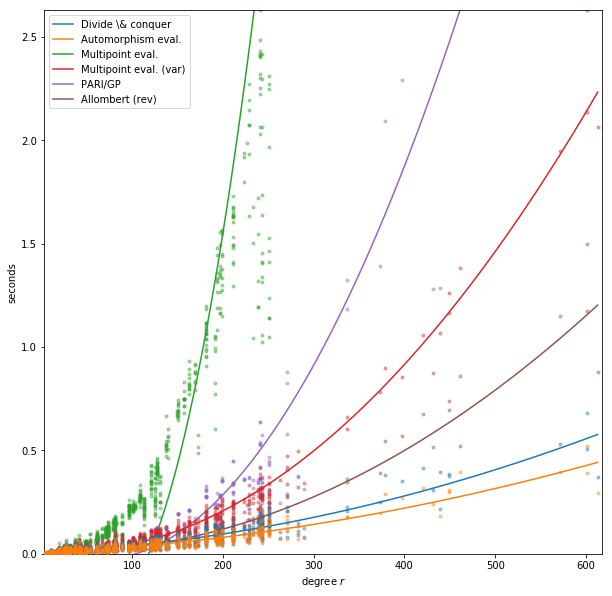

In [4]:
_ = plot_allombert_lowaux(d[(d.prime > 100) & (d.prime < 2**20)])

### Arbitrary auxiliary degree

Comparison of variants of Allombert algorithm as a function of the auxiliary degree $s=\mathrm{ord}_q(r)$. Individual running times are scaled down by $r^2$. Dots represent individual runs, lines represent degree $2$ linear regressions.

The "Automorphism evaluation" is still the best performer, however it is joined by the (naive) "multipoint evaluation". PARI/GP is surprisingly slow, especially when compared to our own re-implementation of the same algorithm (Allombert (rev)).

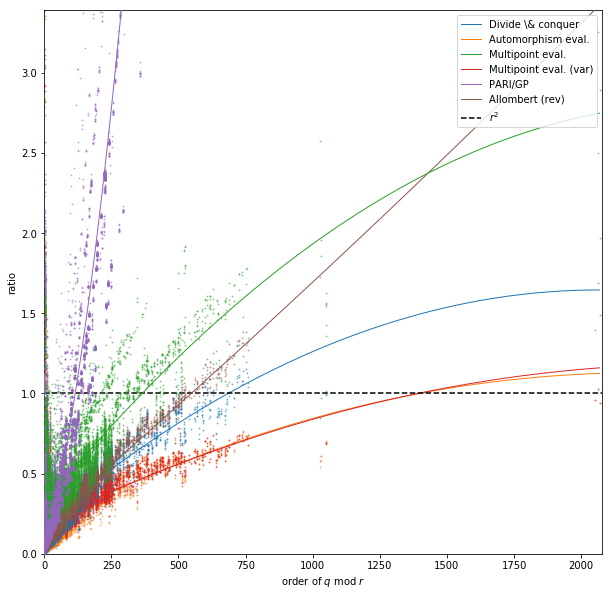

In [5]:
_ = plot_allombert_anyaux(d[(d.prime > 100) & (d.prime < 2**20)])

Comparison of variants of Allombert algorithm as a function of the prime $q$. Individual running times are scaled down by $s=\mathrm{ord}_r(q)$. Degrees $r$ have been limited to $200$ for readability. Dots represent individual runs, lines represent degree $2$ linear regressions.

The "Divide and conquer" variant apparently shows a better asymptotic behaviour than other variants, however it should be noted that as $q$ grows we are only able to test small extension degrees. Consequently, the auxiliary degree $s=\mathrm{ord}_r(q)$ is also small, and it was already noted in the previous graphs that "Divide and conquer" is very good for small auxiliary degrees.

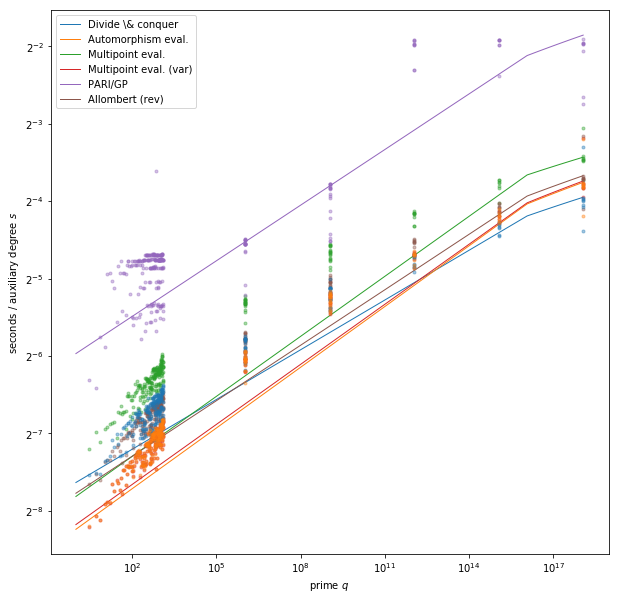

In [6]:
_ = plot_allombert_p(d[d.degree < 200])

## Rains' algorithm

### Comparison of the variants

Comparison of the cyclotomic, conic, and elliptic variants of Rains' algorithm, by increasing extension degree $r$. Auxiliary extension degrees $s$ for cyclotomic Rains' range between 1 and 9. Lines represent median times.

The Conic variant performs better than the Cyclotomic variant for $s=2$, and the Elliptic variant looks like a reasonable alternative to the Cyclotomic variant for $s≥3$.

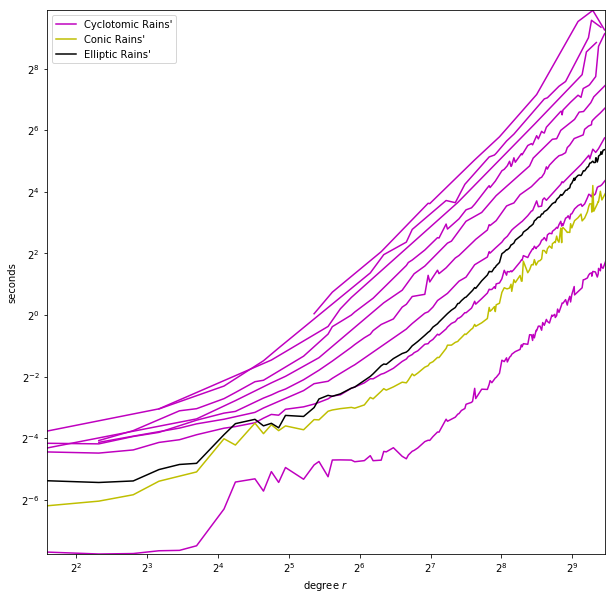

In [7]:
_ = plot_rains(d[(d.prime > 100) & (d.prime < 2**20)])

Comparison by prime increasing prime $q$, up to 64 bits. Auxiliary extension degrees $s$ for cyclotomic Rains' range between 1 and 9 (darker is larger). Extension degree $r$ limited to $200$ for readability.

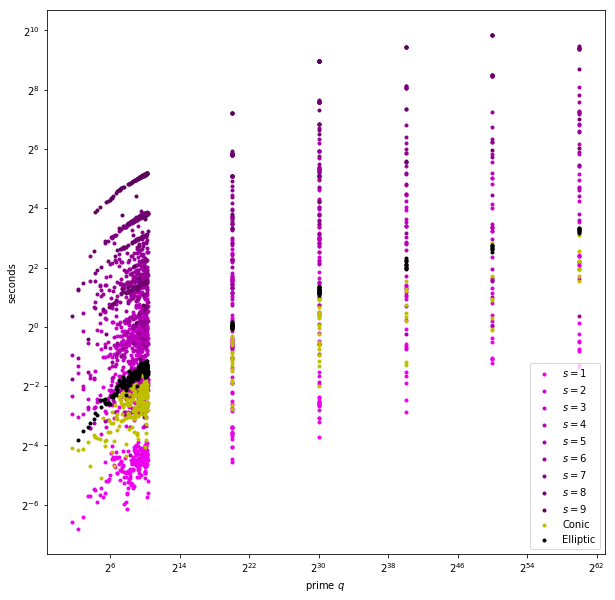

In [8]:
_ = plot_rains_p(d[(d.degree < 200)])

### Comparison with Magma v2.22-7

Comparison of our implementation of Rains' cyclotomic algorithm with Magma's. Running time of our implementation (in seconds) vs ratio of Magma's running time over ours.

We mostly beat Magma, and more consistently so as the running times increase. However there are serveral outliers in both direction.

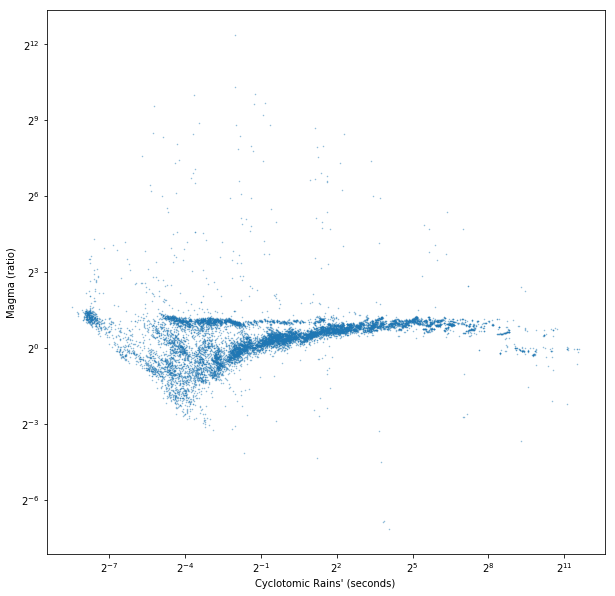

In [9]:
_ = plot_magma(d[(d.prime > 100) & (d.prime < 2**20)])

## Global comparison

###  Allombert vs Rains

Comparison of Allombert's algorithm (automorphism evaluation variant) and Rains' algorithm variants. Extension degree $r$ is limited to $2^{10}$ for readability. Runs of Allombert's algorithm are grouped by ranges of auxiliary degree $s=\mathrm{ord}_q(r)$. Lines represent median times (all algorithms), shaded areas represent maximum and minimum times (only Allombert's algorithm).

Overall, the Cyclotomic of Conic variants seems to be of minor interest, compared to Allombert's algorithm. The Elliptic variant looks mostly useless for these parameter ranges.

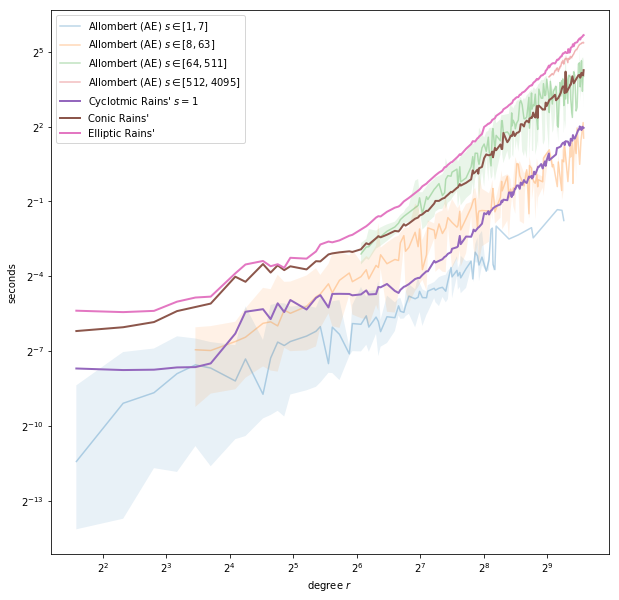

In [10]:
_ = plot_all(d[(d.prime > 100) & (d.prime < 2**20) & (d.degree < 2**10)])